# Image Classification with Feature Extraction
This notebook demonstrates a complete workflow for classifying images into 'infected' and 'normal' categories using feature extraction techniques. The steps include:
- Data Cleaning
- Feature Extraction
- Feature Selection (correlation and PCA)
- Classification (Random Forest)
- Evaluation (classification report, confusion matrix, ROC-AUC)

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.preprocessing import StandardScaler
import seaborn as sns

import os
import numpy as np
from skimage.feature import hog, local_binary_pattern
from skimage.color import rgb2gray
from skimage.io import imread
from skimage.transform import resize
from skimage.io import imread
from scipy.stats import kurtosis, skew

from sklearn.decomposition import PCA

## Step 1: Define Dataset Path and Feature Extraction
We define the dataset path and do for feature extraction. 

### **Key Methods and Their Justifications**:
1. **HOG (Histogram of Oriented Gradients)**:
   - Captures shape and edge structures by analyzing the gradients of image intensity.
   - Suitable for detecting structural abnormalities or patterns in medical images.

2. **LBP (Local Binary Patterns)**:
   - Encodes local texture by thresholding neighboring pixel values.
   - Excellent for texture analysis, often used in gray-scale image classification.

3. **Statistical Moments (Mean, Variance, Skewness, Kurtosis)**:
   - Summarize the intensity distribution of the image.
   - Provide a global overview of brightness, contrast, asymmetry, and sharpness.

4. **FFT (Fast Fourier Transform)**:
   - Transforms images to the frequency domain for analyzing texture and periodic patterns.
   - Useful for detecting repeating structures or noise patterns.

5. **Histogram Features**:
   - Intensity histograms describe the tonal range of the image.
   - Useful for analyzing overall brightness and contrast variations.

---



In [19]:

# Resize images and set random seed
IMG_SIZE = (128, 128)  # Resize images to 128x128
RANDOM_SEED = 40
np.random.seed(RANDOM_SEED)

# Function to extract features
def extract_features(dataset_path, num_samples=200):
    """
    Extracts features from images using five methods suitable for gray image analysis:
    1. HOG (Histogram of Oriented Gradients)
    2. LBP (Local Binary Patterns)
    3. Statistical Moments (Mean, Variance, Skewness, Kurtosis)
    4. FFT-based Texture Features
    5. Histogram Features
    Arguments:
        dataset_path: str, path to the dataset containing 'infected' and 'noninfected' folders
        num_samples: int, number of samples to process from each class
    Returns:
        features: numpy array of extracted features
        labels: numpy array of corresponding labels
    """
    features = []
    labels = []
    
    # Class labels and paths
    classes = {'infected': 1, 'noninfected': 0}
    for label_name, label in classes.items():
        class_dir = os.path.join(dataset_path, label_name)
        if not os.path.exists(class_dir):
            print(f"Directory {class_dir} does not exist.")
            continue
        
        # Process images in the folder
        images = os.listdir(class_dir)[:num_samples]  # Limit to num_samples
        count=1
        for img_file in images:
            print(count)
            count+=1
            img_path = os.path.join(class_dir, img_file)
            try:
                # Load, convert to grayscale, and resize image
                img = imread(img_path)
                gray_img = rgb2gray(img) if img.ndim == 3 else img
                gray_img = resize(gray_img, IMG_SIZE, anti_aliasing=True)
                
                # Initialize feature vector
                feature_vector = []
                
                # 1. HOG Features
                print("Extracting HOG Features")
                # HOG captures edge and shape information, suitable for structural analysis
                hog_features = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
                feature_vector.extend(hog_features)
                
                # 2. LBP Features
                print("Extracting LBP Features")
                # LBP captures local texture patterns, useful for identifying subtle differences in texture
                lbp = local_binary_pattern(gray_img, P=8, R=1, method='uniform')  # 8 neighbors, radius 1
                lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), density=True)
                feature_vector.extend(lbp_hist)
                
                # 3. Statistical Moments
                print("Finding Statistical Moments")
                # Statistical moments like mean, variance, skewness, and kurtosis capture image intensity distribution
                feature_vector.extend([
                    np.mean(gray_img), np.var(gray_img),
                    skew(gray_img.ravel()), kurtosis(gray_img.ravel())
                ])
                
                # 4. FFT-based Texture Features
                print("Extracting FFT-based Texture Features")
                # FFT provides frequency domain features useful for texture and periodic pattern analysis
                fft_img = np.abs(np.fft.fft2(gray_img))
                fft_features = [
                    np.mean(fft_img), np.var(fft_img)
                ]
                feature_vector.extend(fft_features)
                
                # 5. Histogram Features
                print("Extracting Histogram Features")
                # Image histograms capture intensity distribution and overall tone
                hist, _ = np.histogram(gray_img, bins=10, range=(0, 1), density=True)
                feature_vector.extend(hist)
                
                # Append features and labels
                features.append(feature_vector)
                labels.append(label)
            
            except Exception as e:
                print(f"Error processing {img_path}: {e}")
    
    # Convert to numpy arrays
    return np.array(features), np.array(labels)

# Main Script
DATASET_PATH = r"D:\USD Univ. San Diego MS AI\AAI-521\Project Data\PCOS_11784 files\PCOS"
features, labels = extract_features(DATASET_PATH)



1
Extracting HOG Features
Extracting LBP Features
Finding Statistical Moments
Extracting FFT-based Texture Features
Extracting Histogram Features
2
Extracting HOG Features
Extracting LBP Features
Finding Statistical Moments
Extracting FFT-based Texture Features
Extracting Histogram Features
3


C:\Users\Soumiz\anaconda3\Lib\site-packages\skimage\feature\texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


Extracting HOG Features
Extracting LBP Features
Finding Statistical Moments
Extracting FFT-based Texture Features
Extracting Histogram Features
4
Extracting HOG Features
Extracting LBP Features
Finding Statistical Moments
Extracting FFT-based Texture Features
Extracting Histogram Features
5
Extracting HOG Features
Extracting LBP Features
Finding Statistical Moments
Extracting FFT-based Texture Features
Extracting Histogram Features
6
Extracting HOG Features
Extracting LBP Features
Finding Statistical Moments
Extracting FFT-based Texture Features
Extracting Histogram Features
7
Extracting HOG Features
Extracting LBP Features
Finding Statistical Moments
Extracting FFT-based Texture Features
Extracting Histogram Features
8
Extracting HOG Features
Extracting LBP Features
Finding Statistical Moments
Extracting FFT-based Texture Features
Extracting Histogram Features
9
Extracting HOG Features
Extracting LBP Features
Finding Statistical Moments
Extracting FFT-based Texture Features
Extracting

In [24]:

# Output feature dimensions and label distribution
print("Feature extraction completed.")
print(f"Feature matrix shape: {features.shape}")
print(f"Label distribution: {np.bincount(labels)}")

# Save features and labels to a CSV file
FEATURES_CSV = "features_final_.csv"  # Specify the output file name

# Combine features and labels into a single DataFrame
data = pd.DataFrame(features)
data['label'] = labels  # Add labels as the last column

# Save to CSV
data.to_csv(FEATURES_CSV, index=False)
print(f"Features and labels saved to {FEATURES_CSV}")
print(f"Feature matrix shape: {data.shape}")

Feature extraction completed.
Feature matrix shape: (400, 8127)
Label distribution: [200 200]
Features and labels saved to features_final_.csv
Feature matrix shape: (400, 8128)


## Step 2: Standardize the Features
Standardizing the features ensures that all features contribute equally to the model.

### Standardization:
 **Explanation**:
1. **Why Standardize?**
   - Standardization transforms the features to have a mean of 0 and a standard deviation of 1.
   - This ensures that all features contribute equally during model training.

2. **`StandardScaler` Functionality**:
   - **`fit_transform()`**: Fits the scaler to the data (computes mean and std) and then transforms the data.
   - Standardization formula:  
$$
          z = \frac{x - \mu}{\sigma}
$$
     Where \(x\) is the original feature, $\mu$ is the mean, and $\sigma$ is the standard deviation.

---



### Read Dataset

In [1]:
import pandas as pd
import numpy as np

# Path to the features CSV file
FEATURES_CSV_PATH = "features_final.csv"  # Adjust the path if the file is in a different directory

# Read the CSV file into a Pandas DataFrame
try:
    features_df = pd.read_csv(FEATURES_CSV_PATH, header=None)  # No header as features don't have column names
    features = features_df.values  # Convert to a NumPy array
    print(f"Features loaded successfully. Shape: {features.shape}")
except FileNotFoundError:
    print(f"File '{FEATURES_CSV_PATH}' not found. Please check the file path.")



C:\Users\Soumiz\AppData\Local\Temp\ipykernel_14956\2847421696.py:9: DtypeWarning: Columns (8126) have mixed types. Specify dtype option on import or set low_memory=False.
  features_df = pd.read_csv(FEATURES_CSV_PATH, header=None)  # No header as features don't have column names


Features loaded successfully. Shape: (401, 8127)


In [3]:
import pandas as pd
import numpy as np

# Step 1: Load the features and labels CSV file
try:
    features_df = pd.read_csv('features_final.csv', header=0)  # Read with header, assuming first row is column names
    features = features_df.values  # Convert to a NumPy array
    print(f"Features loaded successfully. Shape: {features.shape}")
except FileNotFoundError:
    print(f"File '{FEATURES_CSV_PATH}' not found. Please check the file path.")

print(f"Loaded features with shape: {features_df.shape}")

# Step 2: Extract the labels (the last column) and convert to numeric if necessary
labels = features_df.iloc[:, -1].values  # Get the last column as labels
print(f"Labels extracted. First few labels: {labels[:5]}")

# Convert labels to numeric type (if necessary)
labels = pd.to_numeric(labels, errors='coerce')  # Coerce any errors to NaN

# Step 3: Check if any NaN values in labels and remove the corresponding rows from features
if np.any(np.isnan(labels)):
    valid_rows = ~np.isnan(labels)  # Mask for valid rows
    features_df = features_df[valid_rows]  # Remove invalid rows from features
    labels = labels[valid_rows]  # Remove invalid labels

# Step 4: Extract features (exclude the last column which contains labels)
features = features_df.iloc[:, :-1].values  # All columns except the last one (labels)

# Step 5: Now append the labels back to the features for saving
features_with_labels = np.column_stack((features, labels))

# Step 6: Save the cleaned features and labels to separate CSV files
np.savetxt('labels.csv', labels, delimiter=',', header='labels', comments='', fmt='%f')
np.savetxt('features.csv', features, delimiter=',', header='features', comments='', fmt='%f')

# Optionally, save features with labels together (if needed)
np.savetxt('features_with_labels.csv', features_with_labels, delimiter=',', header='features,labels', comments='', fmt='%f')

# Output the shape of the saved data
print(f"Features saved with shape: {features.shape}")
print(f"Labels saved with shape: {labels.shape}")


Features loaded successfully. Shape: (400, 8127)
Loaded features with shape: (400, 8127)
Labels extracted. First few labels: [1 1 1 1 1]
Features saved with shape: (400, 8126)
Labels saved with shape: (400,)


In [4]:

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Output the shape of the standardized feature matrix
print("Features standardized.")
print(f"Standardized feature matrix shape: {features_scaled.shape}")


Features standardized.
Standardized feature matrix shape: (400, 8126)


### Append the Labels Back

In [5]:
# Assuming labels is a 1D array
scaled_features_with_labels = np.column_stack((features_scaled, labels))  # Or use np.hstack

# Output the shape of the standardized feature matrix
print("Label appended with standardized Features.")
print(f"Standardized feature matrix shape: {features_with_labels.shape}")


Label appended with standardized Features.
Standardized feature matrix shape: (400, 8127)


## Step 3: Feature Correlation Analysis
We compute the correlation matrix and remove highly correlated features.

### Algorithm for feature redundancy reduction

1. **Split the dataset into small parts.** 
2. **For each subset:**
    - Compute the correlation matrix for the subset.
    - Select the non-correlated features.
3. **Combine the features from all subsets.** After all subsets are processed, concatenate them into a final feature set.
4. **Check the final correlation matrix.** If there are still highly correlated features, remove them.


### **Benefits of This Approach:**
- **Memory Efficient**: By processing the data in smaller chunks (subsets), the memory consumption is reduced, which is beneficial for machines with lower RAM.
- **More Control**: This approach gives us control over how to handle highly correlated features in each subset before combining them.



### Take Features (columns) in Batches 

#### correlation threshold = 0.9

<span style='color:purple'> $NOT$ $USED$ $FINALLY$

In [6]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
correlation_threshold = 0.9  # Threshold for correlation
batch_size = 100  # Number of columns per batch

# Assuming 'features_scaled' and 'labels' are already available
print(f"Features shape: {features_scaled.shape}")
print(f"Labels shape: {labels.shape}")

# Step 1: Function to Process Columns in Batches
def process_column_batches(features, label):
    """
    Process column batches for a given set of features and a label.
    Args:
        features: Numpy array of features for a specific label.
        label: The label for the current subset (1 or 0).
    Returns:
        A reduced feature matrix with low-correlated features and corresponding labels.
    """
    num_columns = features.shape[1]
    num_batches = num_columns // batch_size + (num_columns % batch_size > 0)
    print(f"Processing label {label} in {num_batches} column batches.")
    
    retained_indices = []
    
    for i in range(num_batches):
        start = i * batch_size
        end = min((i + 1) * batch_size, num_columns)
        
        # Get the current batch of columns
        batch_features = features[:, start:end]
        
        # Compute correlation matrix for the current column batch
        correlation_matrix = np.corrcoef(batch_features.T)
        
        # Identify low-correlated features in the batch
        upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)
        highly_correlated = [
            column for column in range(correlation_matrix.shape[0])
            if any(abs(correlation_matrix[:, column][upper_triangle[:, column] > 0]) > correlation_threshold)
        ]
        retained_batch_indices = np.setdiff1d(np.arange(batch_features.shape[1]), highly_correlated)
        retained_indices.extend(retained_batch_indices + start)  # Offset indices by start
        
        print(f"Label {label}, Batch {i + 1}/{num_batches}: Retained {len(retained_batch_indices)} features.")
    
    # Retain only low-correlated features across all batches
    final_features = features[:, retained_indices]
    print(f"Label {label}: Total retained features: {final_features.shape[1]}")
    
    # Append labels to the reduced features
    final_labels = np.full((final_features.shape[0], 1), label)
    final_features_with_labels = np.hstack((final_features, final_labels))
    
    return final_features_with_labels


# Step 2: Split the dataset by label
features_label_1 = features_scaled[labels == 1]
features_label_0 = features_scaled[labels == 0]

print(f"Features for label 1: {features_label_1.shape}")
print(f"Features for label 0: {features_label_0.shape}")

# Step 3: Process each label separately
features_with_labels_1 = process_column_batches(features_label_1, label=1)
features_with_labels_0 = process_column_batches(features_label_0, label=0)

# Step 4: Ensure both feature sets have the same number of features
num_features_label_1 = features_with_labels_1.shape[1] - 1  # Excluding the label column
num_features_label_0 = features_with_labels_0.shape[1] - 1  # Excluding the label column

if num_features_label_1 > num_features_label_0:
    padding = np.zeros((features_with_labels_0.shape[0], num_features_label_1 - num_features_label_0))
    padded_features_with_labels_0 = np.hstack((features_with_labels_0[:, :-1], padding, features_with_labels_0[:, -1:]))
    padded_features_with_labels_1 = features_with_labels_1
elif num_features_label_1 < num_features_label_0:
    padding = np.zeros((features_with_labels_1.shape[0], num_features_label_0 - num_features_label_1))
    padded_features_with_labels_1 = np.hstack((features_with_labels_1[:, :-1], padding, features_with_labels_1[:, -1:]))
    padded_features_with_labels_0 = features_with_labels_0
else:
    padded_features_with_labels_1 = features_with_labels_1
    padded_features_with_labels_0 = features_with_labels_0

# Step 5: Combine the two processed feature sets
final_dataset = np.vstack((padded_features_with_labels_1, padded_features_with_labels_0))

# Step 6: Save the final dataset to CSV
final_df = pd.DataFrame(final_dataset)
final_df.to_csv("final_features_with_labels_copy1.csv", index=False, header=False)
print("Final feature set with labels saved to 'final_features_with_labels.csv'.")


Features shape: (400, 8126)
Labels shape: (400,)
Features for label 1: (200, 8126)
Features for label 0: (200, 8126)
Processing label 1 in 82 column batches.
Label 1, Batch 1/82: Retained 89 features.
Label 1, Batch 2/82: Retained 75 features.
Label 1, Batch 3/82: Retained 63 features.
Label 1, Batch 4/82: Retained 65 features.
Label 1, Batch 5/82: Retained 95 features.
Label 1, Batch 6/82: Retained 95 features.
Label 1, Batch 7/82: Retained 77 features.
Label 1, Batch 8/82: Retained 68 features.
Label 1, Batch 9/82: Retained 66 features.
Label 1, Batch 10/82: Retained 89 features.
Label 1, Batch 11/82: Retained 89 features.
Label 1, Batch 12/82: Retained 81 features.
Label 1, Batch 13/82: Retained 70 features.
Label 1, Batch 14/82: Retained 65 features.
Label 1, Batch 15/82: Retained 72 features.
Label 1, Batch 16/82: Retained 88 features.
Label 1, Batch 17/82: Retained 81 features.
Label 1, Batch 18/82: Retained 74 features.
Label 1, Batch 19/82: Retained 64 features.
Label 1, Batch 

#### Check shapes 

In [7]:
try:
    features_df = pd.read_csv('final_features_with_labels.csv', header = None)  # Read without header, assuming first row is NOT column names

    # Create Header details
    num_columns = features_df.shape[1]
    headers = list(range(num_columns - 1)) + ["labels"]

    # Create a header row
    header_row = pd.DataFrame([headers])
    
    # Prepend the header row to the DataFrame
    features_df_header = pd.concat([header_row, features_df], ignore_index=True)

    
    features = features_df.values  # Convert to a NumPy array
    print(f"Features loaded successfully. Shape: {features.shape}")
    
except FileNotFoundError:
    print(f"File '{FEATURES_CSV_PATH}' not found. Please check the file path.")

print(f"Loaded features with shape: {features_df.shape}")

features_for_0 = features[labels==0]
features_for_1 = features[labels==1]

print(f"features for 0 with shape: {features_for_0.shape}")
print(f"features for 1 with shape: {features_for_1.shape}")

Features loaded successfully. Shape: (400, 6498)
Loaded features with shape: (400, 6498)
features for 0 with shape: (200, 6498)
features for 1 with shape: (200, 6498)


#### Correlation threshold = 0.8

<span style='color:Red'> USED TO DESIGN FINAL MODEL

In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt

# Parameters
correlation_threshold = 0.8  # Threshold for correlation
batch_size = 100  # Number of columns per batch

# Assuming 'features_scaled' and 'labels' are already available
print(f"Features shape: {features_scaled.shape}")
print(f"Labels shape: {labels.shape}")

# Step 1: Function to Process Columns in Batches
def process_column_batches(features, label):
    """
    Process column batches for a given set of features and a label.
    Args:
        features: Numpy array of features for a specific label.
        label: The label for the current subset (1 or 0).
    Returns:
        A reduced feature matrix with low-correlated features and corresponding labels.
    """
    num_columns = features.shape[1]
    num_batches = num_columns // batch_size + (num_columns % batch_size > 0)
    print(f"Processing label {label} in {num_batches} column batches.")
    
    retained_indices = []
    
    for i in range(num_batches):
        start = i * batch_size
        end = min((i + 1) * batch_size, num_columns)
        
        # Get the current batch of columns
        batch_features = features[:, start:end]
        
        # Compute correlation matrix for the current column batch
        correlation_matrix = np.corrcoef(batch_features.T)
        
        # Identify low-correlated features in the batch
        upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)
        highly_correlated = [
            column for column in range(correlation_matrix.shape[0])
            if any(abs(correlation_matrix[:, column][upper_triangle[:, column] > 0]) > correlation_threshold)
        ]
        retained_batch_indices = np.setdiff1d(np.arange(batch_features.shape[1]), highly_correlated)
        retained_indices.extend(retained_batch_indices + start)  # Offset indices by start
        
        print(f"Label {label}, Batch {i + 1}/{num_batches}: Retained {len(retained_batch_indices)} features.")
    
    # Retain only low-correlated features across all batches
    final_features = features[:, retained_indices]
    print(f"Label {label}: Total retained features: {final_features.shape[1]}")
    
    # Append labels to the reduced features
    final_labels = np.full((final_features.shape[0], 1), label)
    final_features_with_labels = np.hstack((final_features, final_labels))
    
    return final_features_with_labels


# Step 2: Split the dataset by label
features_label_1 = features_scaled[labels == 1]
features_label_0 = features_scaled[labels == 0]

print(f"Features for label 1: {features_label_1.shape}")
print(f"Features for label 0: {features_label_0.shape}")

# Step 3: Process each label separately
features_with_labels_1 = process_column_batches(features_label_1, label=1)
features_with_labels_0 = process_column_batches(features_label_0, label=0)

# Step 4: Ensure both feature sets have the same number of features
num_features_label_1 = features_with_labels_1.shape[1] - 1  # Excluding the label column
num_features_label_0 = features_with_labels_0.shape[1] - 1  # Excluding the label column

if num_features_label_1 > num_features_label_0:
    padding = np.zeros((features_with_labels_0.shape[0], num_features_label_1 - num_features_label_0))
    padded_features_with_labels_0 = np.hstack((features_with_labels_0[:, :-1], padding, features_with_labels_0[:, -1:]))
    padded_features_with_labels_1 = features_with_labels_1
elif num_features_label_1 < num_features_label_0:
    padding = np.zeros((features_with_labels_1.shape[0], num_features_label_0 - num_features_label_1))
    padded_features_with_labels_1 = np.hstack((features_with_labels_1[:, :-1], padding, features_with_labels_1[:, -1:]))
    padded_features_with_labels_0 = features_with_labels_0
else:
    padded_features_with_labels_1 = features_with_labels_1
    padded_features_with_labels_0 = features_with_labels_0

# Step 5: Combine the two processed feature sets
final_dataset = np.vstack((padded_features_with_labels_1, padded_features_with_labels_0))

# Step 6: Save the final dataset to CSV
final_df = pd.DataFrame(final_dataset)
final_df.to_csv("final_features_with_labels_below_80.csv", index=False, header=False)
print("Final feature set with labels saved to 'final_features_with_labels_below_80.csv'.")


Features shape: (400, 8126)
Labels shape: (400,)
Features for label 1: (200, 8126)
Features for label 0: (200, 8126)
Processing label 1 in 82 column batches.
Label 1, Batch 1/82: Retained 75 features.
Label 1, Batch 2/82: Retained 60 features.
Label 1, Batch 3/82: Retained 47 features.
Label 1, Batch 4/82: Retained 59 features.
Label 1, Batch 5/82: Retained 71 features.
Label 1, Batch 6/82: Retained 71 features.
Label 1, Batch 7/82: Retained 65 features.
Label 1, Batch 8/82: Retained 61 features.
Label 1, Batch 9/82: Retained 63 features.
Label 1, Batch 10/82: Retained 70 features.
Label 1, Batch 11/82: Retained 71 features.
Label 1, Batch 12/82: Retained 71 features.
Label 1, Batch 13/82: Retained 63 features.
Label 1, Batch 14/82: Retained 64 features.
Label 1, Batch 15/82: Retained 61 features.
Label 1, Batch 16/82: Retained 67 features.
Label 1, Batch 17/82: Retained 71 features.
Label 1, Batch 18/82: Retained 63 features.
Label 1, Batch 19/82: Retained 63 features.
Label 1, Batch 

#### Check shapes 

In [9]:
try:
    features_df = pd.read_csv('final_features_with_labels_below_80.csv', header = None)  # Read without header, assuming first row is NOT column names

    # Create Header details
    num_columns = features_df.shape[1]
    headers = list(range(num_columns - 1)) + ["labels"]

    # Create a header row
    header_row = pd.DataFrame([headers])
    
    # Prepend the header row to the DataFrame
    features_df_header = pd.concat([header_row, features_df], ignore_index=True)

    
    features = features_df.values  # Convert to a NumPy array
    print(f"Features loaded successfully. Shape: {features.shape}")
    
except FileNotFoundError:
    print(f"File '{FEATURES_CSV_PATH}' not found. Please check the file path.")

print(f"Loaded features with shape: {features_df.shape}")

features_for_0 = features[labels==0]
features_for_1 = features[labels==1]

print(f"features for 0 with shape: {features_for_0.shape}")
print(f"features for 1 with shape: {features_for_1.shape}")

Features loaded successfully. Shape: (400, 5400)
Loaded features with shape: (400, 5400)
features for 0 with shape: (200, 5400)
features for 1 with shape: (200, 5400)


### Plot to Visualise the Correlation between Selected Features 

C:\Users\Soumiz\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
C:\Users\Soumiz\anaconda3\Lib\site-packages\numpy\lib\function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


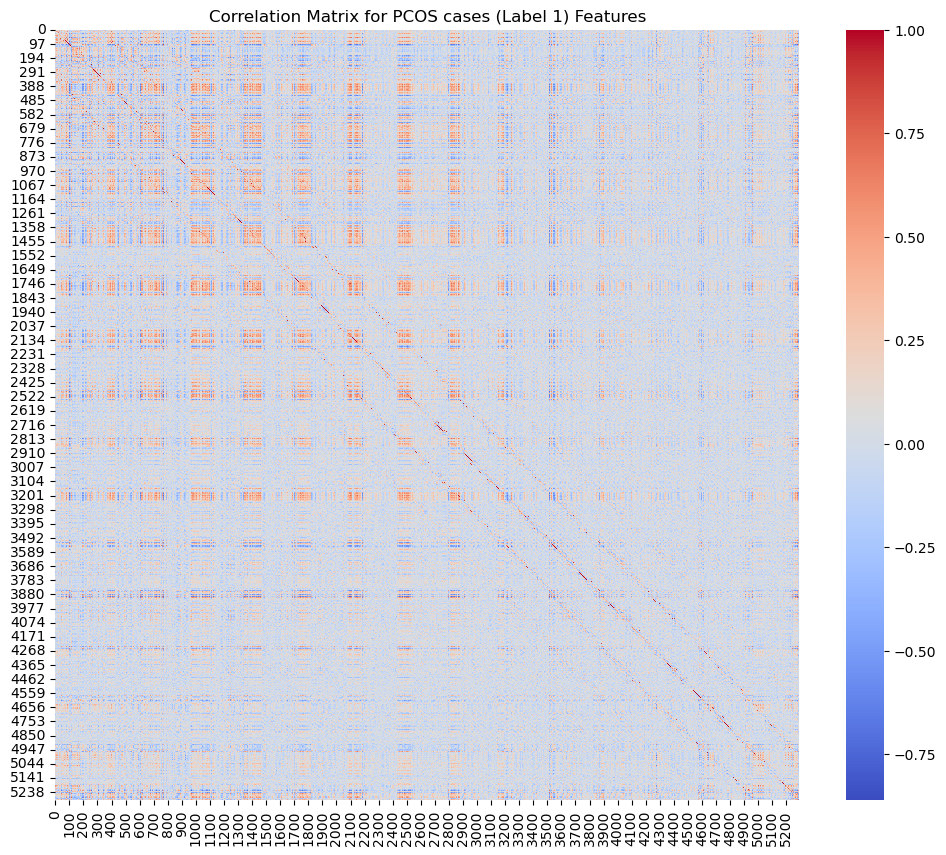

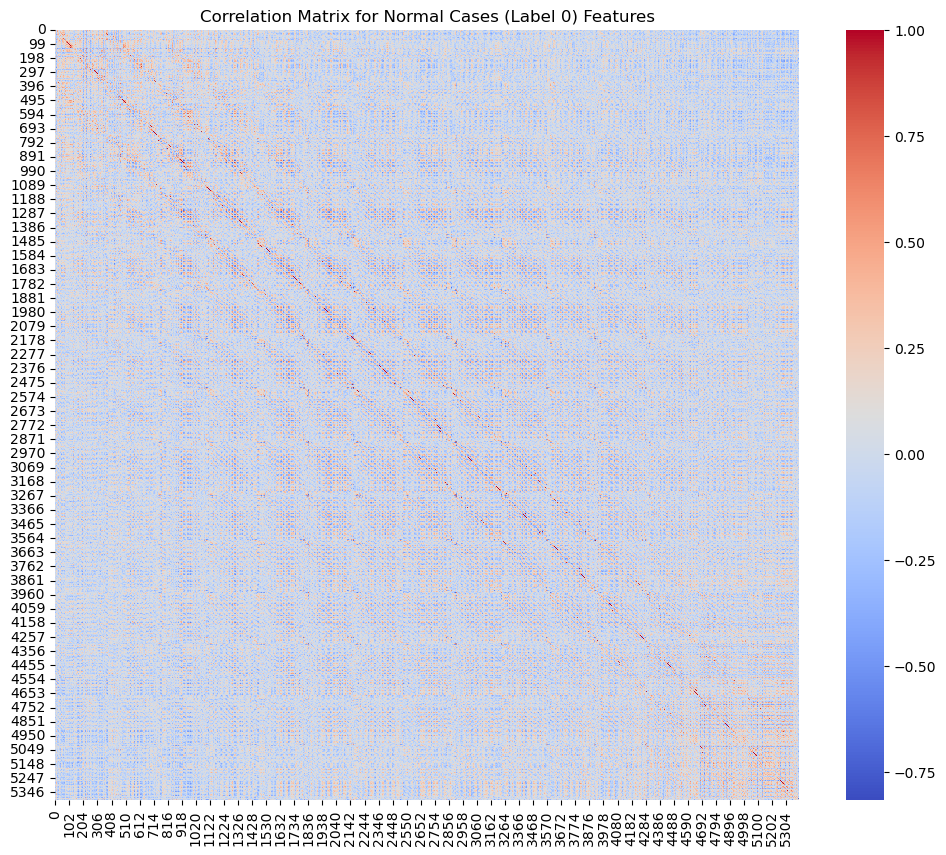

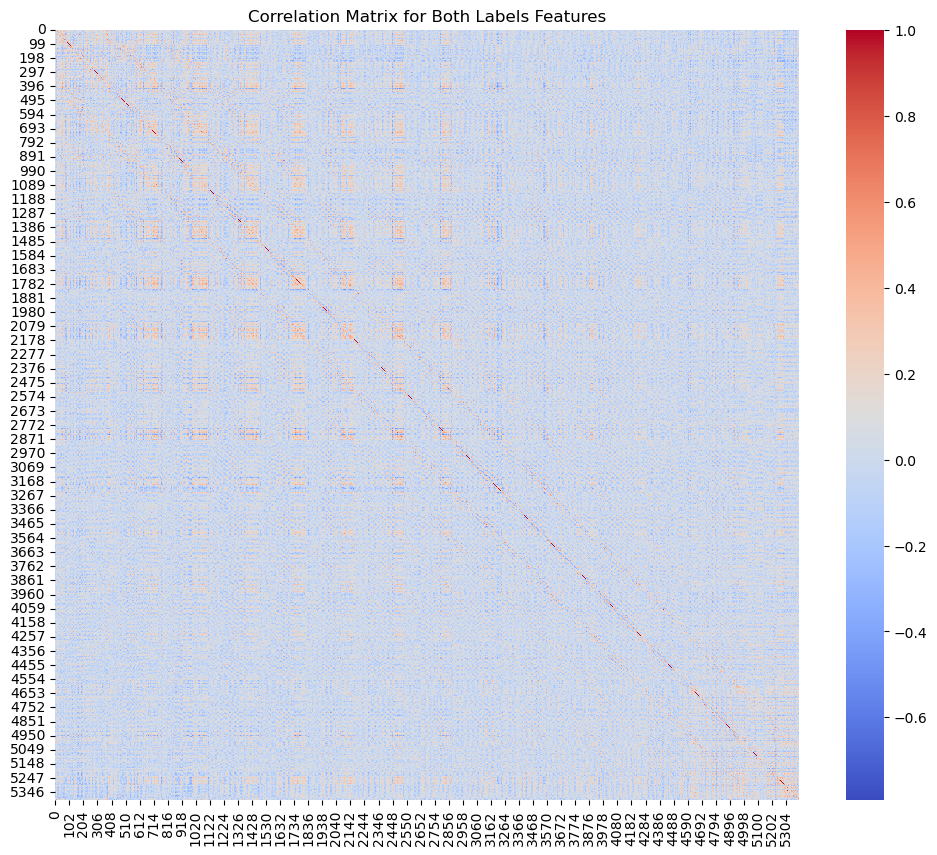

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Extract features from both label sets (remove the last column which contains labels)
features_1 = features_with_labels_1[:, :-1]
features_0 = features_with_labels_0[:, :-1]
# Combine Features
all_features = padded_features_with_labels_1 + padded_features_with_labels_0

# Step 2: Compute the correlation matrices for both sets
correlation_matrix_1 = np.corrcoef(features_1.T)  # Transpose to get correlation between features
correlation_matrix_0 = np.corrcoef(features_0.T)  # Transpose to get correlation between features
all_features_matrix = np.corrcoef(all_features.T)

# Step 3: Plot the heatmap for features with label 1
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_1, cmap='coolwarm', annot=False, fmt='.2f', cbar=True)
plt.title("Correlation Matrix for PCOS cases (Label 1) Features")
plt.show()

# Step 4: Plot the heatmap for features with label 0
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix_0, cmap='coolwarm', annot=False, fmt='.2f', cbar=True)
plt.title("Correlation Matrix for Normal Cases (Label 0) Features")
plt.show()

# Step 5: Plot the heatmap for features with both labels
plt.figure(figsize=(12, 10))
sns.heatmap(all_features_matrix, cmap='coolwarm', annot=False, fmt='.2f', cbar=True)
plt.title("Correlation Matrix for Both Labels Features")
plt.show()


## Step 4: Dimensionality Reduction with PCA
PCA is used to reduce the dimensions of the feature set while retaining most of the variance.

PCA for label 1 = (200, 160)
Label 1: Features after PCA (50 components): 50
PCA for label 0 = (200, 85)
Label 0: Features after PCA (50 components): 50


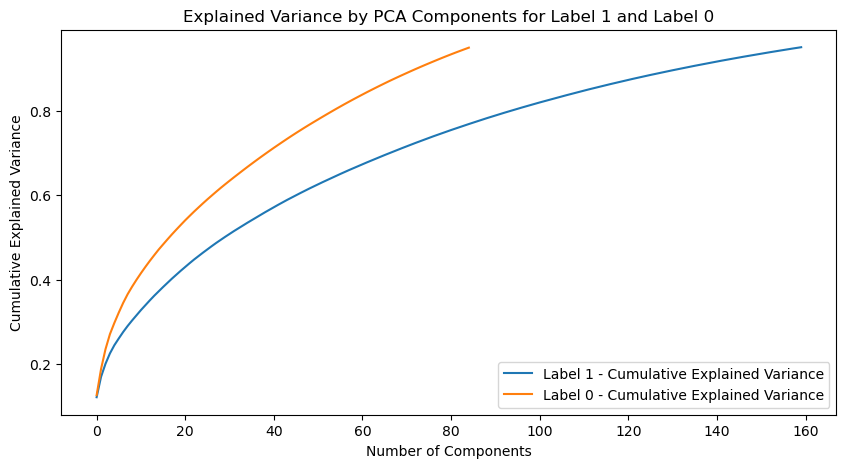

Final PCA feature set with labels saved to 'final_pca_features_with_labels.csv'.


In [12]:

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features_1_scaled = features_1

# Apply PCA for features of label 1 (assuming you want to retain 95% of the variance)
pca_1 = PCA(n_components=0.95)  # Retain 95% of variance
features_1_pca = pca_1.fit_transform(features_1_scaled)
print(f'PCA for label 1 = {features_1_pca.shape}')

features_1_pca_n_50 = features_1_pca[:, :50]  # Retain the first 50 principal components
print(f"Label 1: Features after PCA (50 components): {features_1_pca_n_50.shape[1]}")

features_0_scaled = features_0

# Apply PCA for features of label 0 (assuming you want to retain 95% of the variance)
pca_0 = PCA(n_components=0.95)  # Retain 95% of variance
features_0_pca = pca_0.fit_transform(features_0_scaled)
print(f'PCA for label 0 = {features_0_pca.shape}')

features_0_pca_n_50 = features_0_pca[:, :50]  # Retain the first 50 principal components
print(f"Label 0: Features after PCA (50 components): {features_0_pca_n_50.shape[1]}")

# Optional: Plot explained variance ratio for both labels
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca_1.explained_variance_ratio_), label='Label 1 - Cumulative Explained Variance')
plt.plot(np.cumsum(pca_0.explained_variance_ratio_), label='Label 0 - Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.title('Explained Variance by PCA Components for Label 1 and Label 0')
plt.show()

# Combine the PCA features with their respective labels for further processing
final_features_1_with_labels = np.hstack((features_1_pca_n_50, np.ones((features_1_pca_n_50.shape[0], 1))))
final_features_0_with_labels = np.hstack((features_0_pca_n_50, np.zeros((features_0_pca_n_50.shape[0], 1))))

# Combine the two datasets for final analysis
final_dataset = np.vstack((final_features_1_with_labels, final_features_0_with_labels))

# Save the final dataset with PCA features and labels to CSV
final_df = pd.DataFrame(final_dataset)
final_df.to_csv("final_pca_features_with_labels.csv", index=False, header=False)
print("Final PCA feature set with labels saved to 'final_pca_features_with_labels.csv'.")


## Step 5: Split Data
We split the dataset into training and testing sets.

In [13]:
from sklearn.model_selection import train_test_split

# Load the final dataset with PCA features and labels
final_df = pd.read_csv("final_pca_features_with_labels.csv", header=None)

# Split the dataset into features and labels
X = final_df.iloc[:, :-1].values  # All columns except the last column (features)
y = final_df.iloc[:, -1].values   # Last column (labels)

# Split the data into training and testing sets (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of the training and testing sets
print(f"Training set shape: {X_train.shape}, {y_train.shape}")
print(f"Testing set shape: {X_test.shape}, {y_test.shape}")

# Optionally, save the splits to CSV for further use
train_df = pd.DataFrame(np.hstack((X_train, y_train.reshape(-1, 1))))
test_df = pd.DataFrame(np.hstack((X_test, y_test.reshape(-1, 1))))

train_df.to_csv("train_data.csv", index=False, header=False)
test_df.to_csv("test_data.csv", index=False, header=False)
print("Training and testing datasets saved to 'train_data.csv' and 'test_data.csv'.")


Training set shape: (320, 50), (320,)
Testing set shape: (80, 50), (80,)
Training and testing datasets saved to 'train_data.csv' and 'test_data.csv'.


## Step 6A: Classification with Random Forest
We train a Random Forest classifier and evaluate it using cross-validation.

In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

# Train Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

# Evaluate with cross-validation
rf_cv_scores = cross_val_score(rf_classifier, X_train, y_train, cv=5, scoring='accuracy')  # Explicitly define accuracy scoring
print(f"Random Forest CV Accuracy: {np.mean(rf_cv_scores):.2f} (+/- {np.std(rf_cv_scores):.2f})")


Random Forest CV Accuracy: 0.87 (+/- 0.02)


#### Save Model

In [33]:
import joblib

# Save the trained Random Forest model to the root folder
model_filename = 'rf_classifier_model.joblib'
joblib.dump(rf_classifier, model_filename)

print(f"Random Forest model saved to {model_filename}")


Random Forest model saved to rf_classifier_model.joblib


## Step 7A: Evaluation
We evaluate the model using a classification report, confusion matrix, and ROC-AUC curve.

Classification Report:
              precision    recall  f1-score   support

         0.0       0.78      1.00      0.88        36
         1.0       1.00      0.77      0.87        44

    accuracy                           0.88        80
   macro avg       0.89      0.89      0.87        80
weighted avg       0.90      0.88      0.87        80



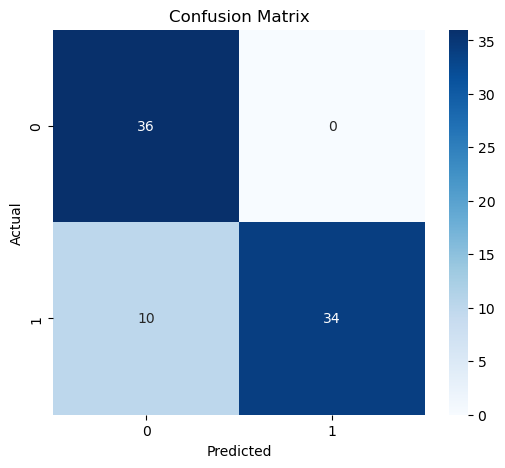

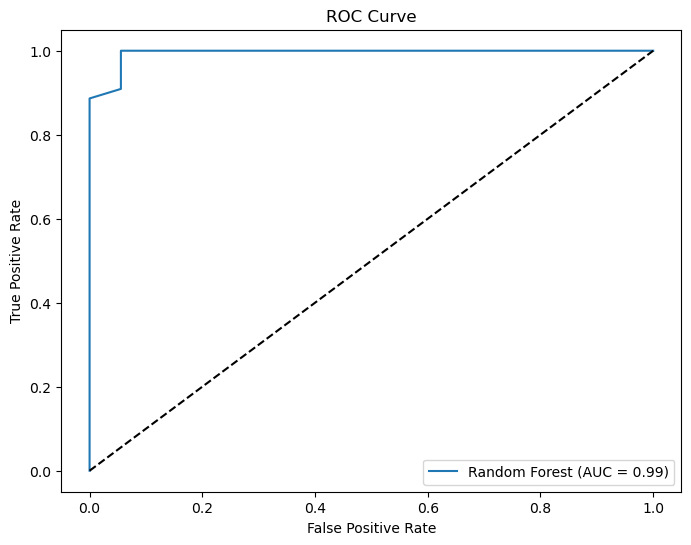

In [15]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Predict and evaluate
rf_predictions = rf_classifier.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, rf_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Curve
rf_probs = rf_classifier.predict_proba(X_test)[:, 1]  # Get the probability for the positive class
auc = roc_auc_score(y_test, rf_probs)  # Calculate AUC score
fpr, tpr, _ = roc_curve(y_test, rf_probs)  # Get False Positive Rate and True Positive Rate

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (chance level)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


## Step 6B: Classification with Gradient Boosting 

In [16]:
from xgboost import XGBClassifier

# Train The Classifier
gb_classifier =  XGBClassifier(random_state=42)
gb_classifier.fit(X_train, y_train)

# Evaluate with cross-validation
gb_cv_scores = cross_val_score(gb_classifier, X_train, y_train, cv=5, scoring='accuracy')  # Explicitly define accuracy scoring
print(f"GB cross-validation Accuracy: {np.mean(gb_cv_scores):.2f} (+/- {np.std(gb_cv_scores):.2f})")


GB cross-validation Accuracy: 0.93 (+/- 0.03)


#### Save Model

In [34]:
import joblib

# Save the trained Random Forest model to the root folder
model_filename = 'gb_classifier_model.joblib'
joblib.dump(gb_classifier, model_filename)

print(f"Gradient Boosting model saved to {model_filename}")


Gradient Boosting model saved to gb_classifier_model.joblib


## Step 7B: Evaluation
We evaluate the model using a classification report, confusion matrix, and ROC-AUC curve.

Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88        36
         1.0       0.91      0.89      0.90        44

    accuracy                           0.89        80
   macro avg       0.89      0.89      0.89        80
weighted avg       0.89      0.89      0.89        80



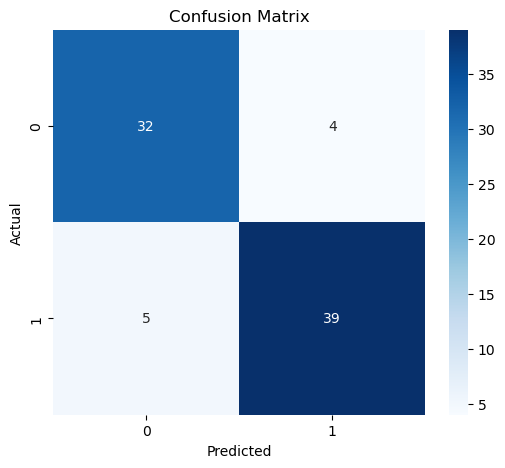

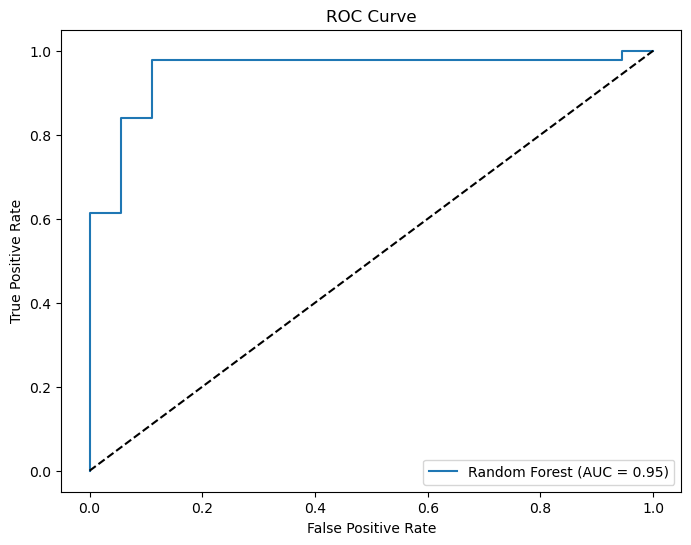

In [17]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import seaborn as sns
import matplotlib.pyplot as plt

# Predict and evaluate
gb_predictions = gb_classifier.predict(X_test)

# Classification Report
print("Classification Report:")
print(classification_report(y_test, gb_predictions))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, gb_predictions)
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# ROC-AUC Curve
gb_probs = gb_classifier.predict_proba(X_test)[:, 1]  # Get the probability for the positive class
auc = roc_auc_score(y_test, gb_probs)  # Calculate AUC score
fpr, tpr, _ = roc_curve(y_test, gb_probs)  # Get False Positive Rate and True Positive Rate

# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f"Random Forest (AUC = {auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line (chance level)
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


-----------

## Final Model for Deployment

In [35]:
import pandas as pd
import numpy as np
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.feature import hog, local_binary_pattern
from skimage.transform import resize
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from joblib import load
import matplotlib.pyplot as plt

# Parameters
IMG_SIZE = (128, 128)  # Resize images to 128x128
correlation_threshold = 0.8  # Threshold for correlation
pca = PCA(n_components=0.8)  # Retain 80% of variance

# Load the pre-trained model (replace with your model path)
gb_classifier_model = load('gb_classifier_model.joblib')

# Assuming scaler is the StandardScaler used during training
scaler = StandardScaler()

# Feature extraction function
def extract_features_from_image(img_path):
    feature_vector = []
    try:
        img = imread(img_path)
        gray_img = rgb2gray(img) if img.ndim == 3 else img
        gray_img = resize(gray_img, IMG_SIZE, anti_aliasing=True)

        # 1. HOG Features
        hog_features = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
        feature_vector.extend(hog_features)

        # 2. LBP Features
        lbp = local_binary_pattern(gray_img, P=8, R=1, method='uniform')
        lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), density=True)
        feature_vector.extend(lbp_hist)

        # 3. Statistical Moments
        feature_vector.extend([np.mean(gray_img), np.var(gray_img), skew(gray_img.ravel()), kurtosis(gray_img.ravel())])

        # 4. FFT-based Texture Features
        fft_img = np.abs(np.fft.fft2(gray_img))
        feature_vector.extend([np.mean(fft_img), np.var(fft_img)])

        # 5. Histogram Features
        hist, _ = np.histogram(gray_img, bins=10, range=(0, 1), density=True)
        feature_vector.extend(hist)

    except Exception as e:
        print(f"Error processing {img_path}: {e}")
    
    return np.array(feature_vector)

# Standardize features
def standardize_features(features):
    return scaler.transform(features)

# Correlation reduction function
def remove_highly_correlated_features(features, correlation_threshold=0.8):
    correlation_matrix = np.corrcoef(features.T)
    upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)
    highly_correlated = [
        column for column in range(correlation_matrix.shape[0])
        if any(abs(correlation_matrix[:, column][upper_triangle[:, column] > 0]) > correlation_threshold)
    ]
    retained_indices = np.setdiff1d(np.arange(features.shape[1]), highly_correlated)
    return features[:, retained_indices]

# Apply PCA
def apply_pca(features):
    return pca.transform(features)

# Predict using the model
def predict_image_class(img_path):
    # Step 1: Extract features from the image
    features = extract_features_from_image(img_path)
    
    # Step 2: Standardize the features
    features_standardized = standardize_features(features.reshape(1, -1))  # Reshape to match model input
    
    # Step 3: Remove highly correlated features
    features_reduced = remove_highly_correlated_features(features_standardized)
    
    # Step 4: Apply PCA
    features_pca = apply_pca(features_reduced)
    
    # Step 5: Predict using the trained model
    prediction = gb_classifier_model.predict(features_pca)
    
    return prediction[0]  # Return the predicted class label (0 or 1)

# Example usage
img_path = input('Provide path_to_your_image.jpg')  # Replace with the actual image path
predicted_class = predict_image_class(img_path)

print(f"The predicted class for the input image is: {predicted_class}")


Provide path_to_your_image.jpg D:\USD Univ. San Diego MS AI\AAI-521\Project Data\PCOS_11784 files\PCOS\noninfected\Image_006.jpg


C:\Users\Soumiz\anaconda3\Lib\site-packages\skimage\feature\texture.py:360: UserWarning: Applying `local_binary_pattern` to floating-point images may give unexpected results when small numerical differences between adjacent pixels are present. It is recommended to use this function with images of integer dtype.
  warnings.warn(


NotFittedError: This StandardScaler instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

<h4 style='color:brown'> We tried many more classifier but no one retured good response

### Logistic Regression

In [18]:
from sklearn.linear_model import LogisticRegression


# Train The Classifier
lg_classifier = LogisticRegression(random_state=42)
lg_classifier.fit(X_train, y_train)

# Evaluate with cross-validation
lg_cv_scores = cross_val_score(lg_classifier, X_train, y_train, cv=5, scoring='accuracy')  # Explicitly define accuracy scoring
print(f"Logistic Regression cross-validation Accuracy: {np.mean(lg_cv_scores):.2f} (+/- {np.std(lg_cv_scores):.2f})")


Logistic Regression cross-validation Accuracy: 0.37 (+/- 0.06)


### SVM

In [19]:
from sklearn.svm import SVC

# Train The Classifier
svm_classifier = SVC(kernel='linear', random_state=42)
svm_classifier.fit(X_train, y_train)

# Evaluate with cross-validation
svm_cv_scores = cross_val_score(svm_classifier, X_train, y_train, cv=5, scoring='accuracy')  # Explicitly define accuracy scoring
print(f"SVM cross-validation Accuracy: {np.mean(svm_cv_scores):.2f} (+/- {np.std(svm_cv_scores):.2f})")


SVM cross-validation Accuracy: 0.42 (+/- 0.04)


### KNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier

# Train The Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X_train, y_train)

# Evaluate with cross-validation
knn_cv_scores = cross_val_score(knn_classifier, X_train, y_train, cv=5, scoring='accuracy')  # Explicitly define accuracy scoring
print(f"KNN cross-validation Accuracy: {np.mean(knn_cv_scores):.2f} (+/- {np.std(knn_cv_scores):.2f})")


KNN cross-validation Accuracy: 0.73 (+/- 0.05)


### Naive Bayes

In [121]:
from sklearn.naive_bayes import GaussianNB

# Train The Classifier
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

# Evaluate with cross-validation
nb_cv_scores = cross_val_score(nb_classifier, X_train, y_train, cv=5, scoring='accuracy')  # Explicitly define accuracy scoring
print(f"Naive Bayes cross-validation Accuracy: {np.mean(nb_cv_scores):.2f} (+/- {np.std(nb_cv_scores):.2f})")


Naive Bayes cross-validation Accuracy: 0.50 (+/- 0.07)


# Use The Model

In [32]:
# **************************************
# 1 Feature Extraction 
#***************************************

# Resize images and set random seed
IMG_SIZE = (128, 128)  # Resize images to 128x128
RANDOM_SEED = 40
np.random.seed(RANDOM_SEED)

# Function to extract features
def extract_features(dataset_path):
    """
    Extracts features from images using five methods suitable for gray image analysis:
    1. HOG (Histogram of Oriented Gradients)
    2. LBP (Local Binary Patterns)
    3. Statistical Moments (Mean, Variance, Skewness, Kurtosis)
    4. FFT-based Texture Features
    5. Histogram Features
    Arguments:
        dataset_path: str, path to the dataset containing 'infected' and 'noninfected' folders
        num_samples: int, number of samples to process from each class
    Returns:
        features: numpy array of extracted features
        labels: numpy array of corresponding labels
    """
    features = []
    
        
    # Process images in the folder
    images = os.listdir(dataset_path)  # Limit to num_samples
    for img_file in images:
        img_path = os.path.join(dataset_path, img_file)
        try:
            # Load, convert to grayscale, and resize image
            img = imread(img_path)
            gray_img = rgb2gray(img) if img.ndim == 3 else img
            gray_img = resize(gray_img, IMG_SIZE, anti_aliasing=True)
            
            # Initialize feature vector
            feature_vector = []
            
            # 1. HOG Features
            print("Extracting HOG Features")
            # HOG captures edge and shape information, suitable for structural analysis
            hog_features = hog(gray_img, pixels_per_cell=(8, 8), cells_per_block=(2, 2), feature_vector=True)
            feature_vector.extend(hog_features)
            
            # 2. LBP Features
            print("Extracting LBP Features")
            # LBP captures local texture patterns, useful for identifying subtle differences in texture
            lbp = local_binary_pattern(gray_img, P=8, R=1, method='uniform')  # 8 neighbors, radius 1
            lbp_hist, _ = np.histogram(lbp.ravel(), bins=np.arange(0, 11), density=True)
            feature_vector.extend(lbp_hist)
            
            # 3. Statistical Moments
            print("Finding Statistical Moments")
            # Statistical moments like mean, variance, skewness, and kurtosis capture image intensity distribution
            feature_vector.extend([
                np.mean(gray_img), np.var(gray_img),
                skew(gray_img.ravel()), kurtosis(gray_img.ravel())
            ])
            
            # 4. FFT-based Texture Features
            print("Extracting FFT-based Texture Features")
            # FFT provides frequency domain features useful for texture and periodic pattern analysis
            fft_img = np.abs(np.fft.fft2(gray_img))
            fft_features = [
                np.mean(fft_img), np.var(fft_img)
            ]
            feature_vector.extend(fft_features)
            
            # 5. Histogram Features
            print("Extracting Histogram Features")
            # Image histograms capture intensity distribution and overall tone
            hist, _ = np.histogram(gray_img, bins=10, range=(0, 1), density=True)
            feature_vector.extend(hist)
            
            # Append features and labels
            features.append(feature_vector)
            labels.append(label)
        
        except Exception as e:
            print(f"Error processing {img_path}: {e}")

    # Convert to numpy arrays
    return np.array(features)

# Main Script
DATASET_PATH = r"D:\USD Univ. San Diego MS AI\AAI-521\Project Data\PCOS_11784 files\PCOS"
features = extract_features(DATASET_PATH)

# **************************************
# 2 Standardize the features
#***************************************

# Standardize the features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Output the shape of the standardized feature matrix
print("Features standardized.")
print(f"Standardized feature matrix shape: {features_scaled.shape}")

# **************************************
# 3  Feature Redundancy Reduction
#***************************************

# Parameter
correlation_threshold = 0.8  # Threshold for correlation

# Compute correlation matrix for the current column batch
correlation_matrix = np.corrcoef(features_scaled.T)

# Identify low-correlated features in the batch
upper_triangle = np.triu(np.ones(correlation_matrix.shape), k=1)
highly_correlated = [
    column for column in range(correlation_matrix.shape[0])
    if any(abs(correlation_matrix[:, column][upper_triangle[:, column] > 0]) > correlation_threshold)
]
retained_batch_indices = np.setdiff1d(np.arange(batch_features.shape[1]), highly_correlated)
retained_indices.extend(retained_batch_indices + start)  # Offset indices by start

# Retain only low-correlated features across all batches
final_features = features[:, retained_indices]

# **************************************
# 4 PCA for Dimensionality Reduction
#***************************************

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

features_n_scaled = final_features

# Apply PCA for features of label 1 (assuming you want to retain 95% of the variance)
pca_n = PCA(n_components=0.8)  # Retain 80% of variance
features_n_pca = pca_1.fit_transform(features_n_scaled)
print(f'PCA for label 1 = {features_n_pca.shape}')

features_pca_n_50 = features_n_pca[:, :50]  # Retain the first 50 principal components
print(f" Features after PCA (50 components): {features_pca_n_50.shape[1]}")


# **************************************
# 4  Features for classifier 
#***************************************
Final_features_check_class = features_pca_n_50

print(Final_features_check_class.shape)


Error processing D:\USD Univ. San Diego MS AI\AAI-521\Project Data\PCOS_11784 files\PCOS\infected: ImageIO does not generally support reading folders. Limited support may be available via specific plugins. Specify the plugin explicitly using the `plugin` kwarg, e.g. `plugin='DICOM'`
Error processing D:\USD Univ. San Diego MS AI\AAI-521\Project Data\PCOS_11784 files\PCOS\noninfected: ImageIO does not generally support reading folders. Limited support may be available via specific plugins. Specify the plugin explicitly using the `plugin` kwarg, e.g. `plugin='DICOM'`


ValueError: Expected 2D array, got 1D array instead:
array=[].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.